In [ ]:
pip install plotly

In [60]:
import pandas as pd
import numpy as np 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
nltk.download(['punkt', 'wordnet'])
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

warnings.filterwarnings('ignore')

# imported the file which contains top 25 headlines, stock went up or down(label) and date
data = pd.read_csv(r'/content/Combined_News_DJIA.csv')
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [61]:
# check for the columns & rows 
data.shape

(1989, 27)

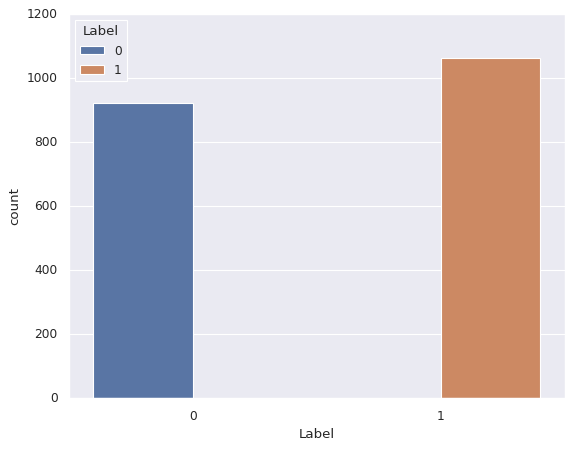

In [62]:
plt.style.use('classic')

sns.set()

ax = sns.countplot(x='Label', hue='Label', data=data)

In [63]:
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [64]:
# filling the null values with median 

data['Top23'].fillna(data['Top23'].median,inplace=True)
data['Top24'].fillna(data['Top24'].median,inplace=True)
data['Top25'].fillna(data['Top25'].median,inplace=True)

In [65]:
# check for NaN values
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [66]:
# create_df function convert top 25 news columns into one column of headlines on each day. 
def create_df(dataset):
    
    dataset = dataset.drop(columns=['Date', 'Label'])
    dataset.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    for col in dataset.columns:
        dataset[col] = dataset[col].str.lower()
        
    headlines = []
    for row in range(0, len(dataset.index)):
        headlines.append(' '.join(str(x) for x in dataset.iloc[row, 0:25]))
        
    df = pd.DataFrame(headlines, columns=['headlines'])
    df['label'] = data.Label
    df['date'] = data.Date
    
    return df

In [67]:
df = create_df(data)
df.head()

,headlines,label,date
0,b georgia downs two russian warplanes as cou...,0,2008-08-08
1,b why wont america and nato help us if they w...,1,2008-08-11
2,b remember that adorable year old who sang a...,0,2008-08-12
3,b u s refuses israel weapons to attack iran ...,0,2008-08-13
4,b all the experts admit that we should legalis...,1,2008-08-14


In [68]:
X = df.headlines

In [69]:
# tokenize into list of words
def tokenize(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for token in tokens:
        clean_token = lemmatizer.lemmatize(token).lower().strip()
        clean_tokens.append(clean_token)

    return clean_tokens

In [70]:
# example for tokenize test  
# example for tokenize test 
for message in X[:1]:
    print(message)
    print(tokenize(message))



b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green 

In [71]:
df.head()

,headlines,label,date
0,b georgia downs two russian warplanes as cou...,0,2008-08-08
1,b why wont america and nato help us if they w...,1,2008-08-11
2,b remember that adorable year old who sang a...,0,2008-08-12
3,b u s refuses israel weapons to attack iran ...,0,2008-08-13
4,b all the experts admit that we should legalis...,1,2008-08-14


In [72]:
train = df[df['date'] < '20150101']
test = df[df['date'] > '20141231']

In [73]:
x_train = train.headlines
y_train = train.label
x_test = test.headlines
y_test = test.label

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
vectorizer_x = TfidfVectorizer()
X_train = vectorizer_x.fit_transform(x_train).toarray()
X_test = vectorizer_x.transform(x_test).toarray()

In [76]:
LDA = LinearDiscriminantAnalysis(n_components=15)
X_train_new = LDA.fit(X_train,y_train)
X_train_new =  LDA.transform(X_train)
X_test_new = LDA.transform(X_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=136,criterion='entropy',random_state=1)
rc.fit(X_train_new,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=136,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_rfc=rc.predict(X_test_new)
print(confusion_matrix(y_test,y_rfc))
print(accuracy_score(y_test,y_rfc))

[[149  37]
 [ 36 156]]
0.8068783068783069
